In [2]:
import os
import os.path as op
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy.ma as ma
from scipy import stats

In [3]:
file_list = [] # This is going to be the list of all filenames that will be included in the analysis

path = './OSM_Data/' # The folder where the Deff csv files are located

ages = ['P14', 'P21', 'P28', 'P35']
slices = 3
vids = 5

for age in ages:
    for slic in range(1, slices+1):
        for vid in range(1, vids+1):
            file_list.append('{}_40nm_s{}_v{}'.format(age, slic, vid))

In [4]:
file_list

['P14_40nm_s1_v1',
 'P14_40nm_s1_v2',
 'P14_40nm_s1_v3',
 'P14_40nm_s1_v4',
 'P14_40nm_s1_v5',
 'P14_40nm_s2_v1',
 'P14_40nm_s2_v2',
 'P14_40nm_s2_v3',
 'P14_40nm_s2_v4',
 'P14_40nm_s2_v5',
 'P14_40nm_s3_v1',
 'P14_40nm_s3_v2',
 'P14_40nm_s3_v3',
 'P14_40nm_s3_v4',
 'P14_40nm_s3_v5',
 'P21_40nm_s1_v1',
 'P21_40nm_s1_v2',
 'P21_40nm_s1_v3',
 'P21_40nm_s1_v4',
 'P21_40nm_s1_v5',
 'P21_40nm_s2_v1',
 'P21_40nm_s2_v2',
 'P21_40nm_s2_v3',
 'P21_40nm_s2_v4',
 'P21_40nm_s2_v5',
 'P21_40nm_s3_v1',
 'P21_40nm_s3_v2',
 'P21_40nm_s3_v3',
 'P21_40nm_s3_v4',
 'P21_40nm_s3_v5',
 'P28_40nm_s1_v1',
 'P28_40nm_s1_v2',
 'P28_40nm_s1_v3',
 'P28_40nm_s1_v4',
 'P28_40nm_s1_v5',
 'P28_40nm_s2_v1',
 'P28_40nm_s2_v2',
 'P28_40nm_s2_v3',
 'P28_40nm_s2_v4',
 'P28_40nm_s2_v5',
 'P28_40nm_s3_v1',
 'P28_40nm_s3_v2',
 'P28_40nm_s3_v3',
 'P28_40nm_s3_v4',
 'P28_40nm_s3_v5',
 'P35_40nm_s1_v1',
 'P35_40nm_s1_v2',
 'P35_40nm_s1_v3',
 'P35_40nm_s1_v4',
 'P35_40nm_s1_v5',
 'P35_40nm_s2_v1',
 'P35_40nm_s2_v2',
 'P35_40nm_s

In [53]:
# Assigning variables
k = 1.3806503e-23 # m^2 kg s^-2 K
#T = 310.15 # K
T = 293.15 # K
mu = 0.001 # kg m^-1 s^-1

r_s = 26 # nm
r_f = 0.3 # nm

Do = k*T/(6*math.pi*mu*r_s*1e-9)*1e12 # um^2/s
print(Do)

8.25846094056375


## Eventually consolidate the following cells

In [54]:
Deff_vals = pd.read_csv(path+'{}_Deff.csv'.format(file_list[1]))
Deff_vals = Deff_vals.rename(columns={'0': 'Deff [um^2/s]'})
Deff_vals[0:5]

,Deff [um^2/s]
0,0.221772
1,1.566248
2,1.181238
3,0.077783
4,0.139892


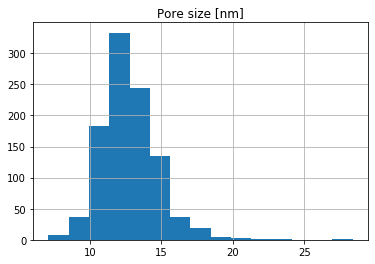

In [59]:
Deff_vals['Pore size [nm]'] = (r_s+r_f)/((-4/math.pi*(np.log(Deff_vals['Deff [um^2/s]']/Do)))**(1/2))-r_f
hist = Deff_vals.hist(column='Pore size [nm]', bins=15)